# While testing, kindly execute all these lines of code

In [1]:
import torch

In [2]:
import pandas as pd

In [3]:
dfTest = pd.read_csv("mnist_test.csv")

In [4]:
dfTest.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
x = dfTest.drop('label', axis=1).values.reshape(-1, 1, 28, 28)

In [6]:
y = dfTest['label'].values

In [7]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [8]:
model = CNN()
model.load_state_dict(torch.load('mnistTrainedCNN.pth',map_location=torch.device('cpu')))

<All keys matched successfully>

In [9]:
import matplotlib.pyplot as plt
def predict(model, x):
    # Assuming x is a numpy array of shape (28, 28)
    x_tensor = torch.tensor(x.reshape(1, 28, 28), dtype=torch.float32).to("cpu")
    output = model(x_tensor)
    _, predicted = torch.max(output.data, 1)
    
    # Convert tensor back to numpy array and reshape for imshow
    x_numpy = x_tensor.cpu().numpy().reshape(28, 28)
    
    print(f"Predicted: {predicted.item()}")

    # Plot the image
    plt.imshow(x_numpy, cmap='gray')
    plt.show()  # Display the image
    
    return predicted.item()

# Kindly change the indices like x[91] to x[18] to test different images, the max index is 10000

Predicted: 6


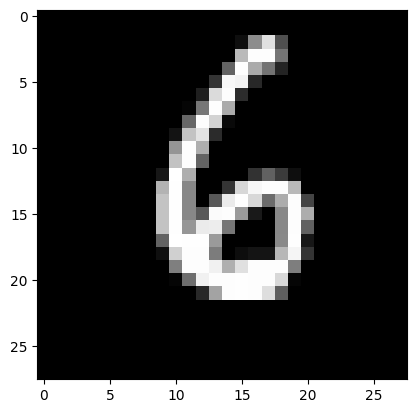

6

In [12]:
predict(model, x[91])